# EO-HARVEST
## Demonstration with PO.DAAC Drive Service (NASA/JPL/PO.DAAC)

In [1]:
# import eo-harvest package
import eo_harvest

# and other stuff
import datetime
import shapely.geometry


## Simple search
Searching granules for a dataset using time and space criteria. Let's search for instance MetOp-B AVHRR Level 2P Sea Surface Temperature dataset (https://podaac.jpl.nasa.gov/dataset/AVHRR_SST_METOP_B-OSISAF-L2P-v1.0), whose id is `PODAAC-GHAMB-2PO02` (refer to https://podaac.jpl.nasa.gov for dataset identifiers)

In [2]:
# define search area as shapely geometry (here a simple rectangular
# box: lonmin, latmin, lonmax, latmax)
area = shapely.geometry.box(-50, -20, -20, 20)

# define search time frame
start = datetime.datetime(2019, 9, 1)
end = datetime.datetime(2019, 9, 2)

# performs the search
# first arg is the data store, here `PODAACDrive`
# second arg is the identifier of the sought product
res = eo_harvest.search_granule(
    'PODAACDrive', 
    'PODAAC-GHAMB-2PO02',
     start, end, area, fetchall=True
)


We get in ``res`` variable the list of granules, with their properties, that were returned by the query. It is possible to display the location of these found granules using ``plot`` function:

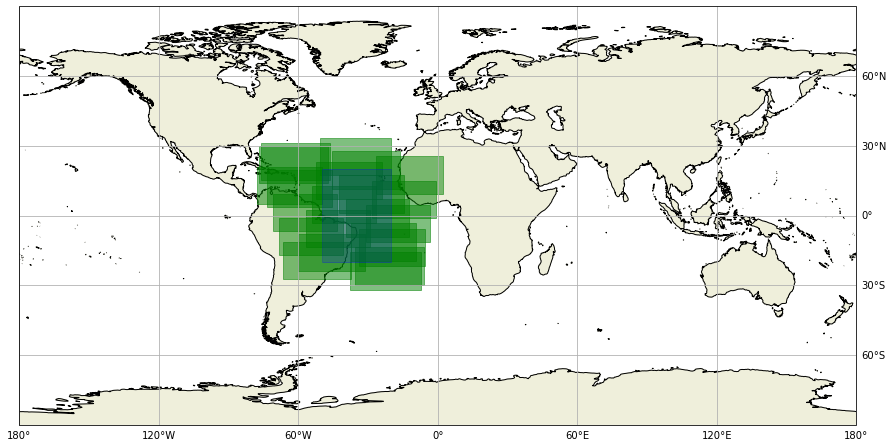

In [3]:
# display the location of found granules
# unfortunately, for most datasets, PODAAC only returns the full bounding box of the data, 
# not the actual footprint, which result in these large boxes not always very informative
# on the actual coverage of the returned result. 
eo_harvest.plot(res, clip=area)

In [4]:
# print the name and URL of found granules
for c in res.items:
    #print(c.name, c.url)
    print(c.url)

https://podaac-tools.jpl.nasa.gov/drive/files/allData/ghrsst/data/GDS2/L2P/AVHRR_SST_METOP_B/OSISAF/v1/2019/244/20190901121903-OSISAF-L2P_GHRSST-SSTsubskin-AVHRR_SST_METOP_B-sstmgr_metop01_20190901_121903-v02.0-fv01.0.nc
https://podaac-tools.jpl.nasa.gov/drive/files/allData/ghrsst/data/GDS2/L2P/AVHRR_SST_METOP_B/OSISAF/v1/2019/244/20190901231303-OSISAF-L2P_GHRSST-SSTsubskin-AVHRR_SST_METOP_B-sstmgr_metop01_20190901_231303-v02.0-fv01.0.nc
https://podaac-tools.jpl.nasa.gov/drive/files/allData/ghrsst/data/GDS2/L2P/AVHRR_SST_METOP_B/OSISAF/v1/2019/244/20190901231003-OSISAF-L2P_GHRSST-SSTsubskin-AVHRR_SST_METOP_B-sstmgr_metop01_20190901_231003-v02.0-fv01.0.nc
https://podaac-tools.jpl.nasa.gov/drive/files/allData/ghrsst/data/GDS2/L2P/AVHRR_SST_METOP_B/OSISAF/v1/2019/244/20190901230703-OSISAF-L2P_GHRSST-SSTsubskin-AVHRR_SST_METOP_B-sstmgr_metop01_20190901_230703-v02.0-fv01.0.nc
https://podaac-tools.jpl.nasa.gov/drive/files/allData/ghrsst/data/GDS2/L2P/AVHRR_SST_METOP_B/OSISAF/v1/2019/244/2019

In [5]:
# display the details of the first granule in the return list
print(res.items[0])

20190901121903-OSISAF-L2P_GHRSST-SSTsubskin-AVHRR_SST_METOP_B-sstmgr_metop01_20190901_121903-v02.0-fv01.0.nc
   start: 2019-09-01 12:19:03
   end: 2019-09-01 12:22:03
   bounding box: POLYGON ((-31.23600006103516 -23.81800079345703, -31.23600006103516 -7.823999881744385, -59.94100189208984 -7.823999881744385, -59.94100189208984 -23.81800079345703, -31.23600006103516 -23.81800079345703))
   url: https://podaac-tools.jpl.nasa.gov/drive/files/allData/ghrsst/data/GDS2/L2P/AVHRR_SST_METOP_B/OSISAF/v1/2019/244/20190901121903-OSISAF-L2P_GHRSST-SSTsubskin-AVHRR_SST_METOP_B-sstmgr_metop01_20190901_121903-v02.0-fv01.0.nc
   opendap: https://podaac-opendap.jpl.nasa.gov/opendap/allData/ghrsst/data/GDS2/L2P/AVHRR_SST_METOP_B/OSISAF/v1/2019/244/20190901121903-OSISAF-L2P_GHRSST-SSTsubskin-AVHRR_SST_METOP_B-sstmgr_metop01_20190901_121903-v02.0-fv01.0.nc.html




## Quicklooks

Quicklooks are currently not available on PODAAC Drive data.

## Download
Let's download here the first granule returned in the list of results:

In [6]:
status = res.items[0].download(mystore='.', silent=False)
print(status)

Downloading: https://podaac-tools.jpl.nasa.gov/drive/files/allData/ghrsst/data/GDS2/L2P/AVHRR_SST_METOP_B/OSISAF/v1/2019/244/20190901121903-OSISAF-L2P_GHRSST-SSTsubskin-AVHRR_SST_METOP_B-sstmgr_metop01_20190901_121903-v02.0-fv01.0.nc to PODAACDrive/PODAAC-GHAMB-2PO02/2019/244/20190901121903-OSISAF-L2P_GHRSST-SSTsubskin-AVHRR_SST_METOP_B-sstmgr_metop01_20190901_121903-v02.0-fv01.0.nc
True


## Multi-search
Let's search crossovers over a storm track for instance, e.g. a series of time and locations. The `multisearch` function allows to pass on the full list of time and locations, and harvest a consolidate result.

This step may takes a long time here, as we send a search request for each storm track time step (every hour), so more than 200 requests for the whole storm life time.

In [7]:
# first get a storm track from our storm track directory
import certoolbox.hurricanes

# identifier of the storm in ATCF convention
ATCF_NAME = 'wp202019'

# read the track
track = certoolbox.hurricanes.track(ATCF_NAME)

# transform into a list of time and search areas, using a colocation radius of 0.5 degrees (to ensure we are close to storm eye).
# The track is interpolated hourly for better precision and we will search within 30 minutes around each hourly track point.
targets = certoolbox.hurricanes.searchable_track(track, radius=0.5, interpolate='1H')

Run the multi-search (may take some time) and display result

In [8]:
res = eo_harvest.multisearch(
    'PODAACDrive',
    'PODAAC-GHAMB-2PO02',
    targets,
    delta_time=datetime.timedelta(minutes=30),
)

404 Client Error: Unknown Reason for url: https://podaac.jpl.nasa.gov/ws/search/granule/?datasetId=PODAAC-GHAMB-2PO02&startTime=2019-10-08T00:30:00Z&endTime=2019-10-08T01:30:00Z&bbox=143.00104634488613,16.509670839355362,144.00104634488613,17.509670839355362&startIndex=0&sortBy=timeAsc&itemsPerPage=400&format=atom
Request failed. Retrying.


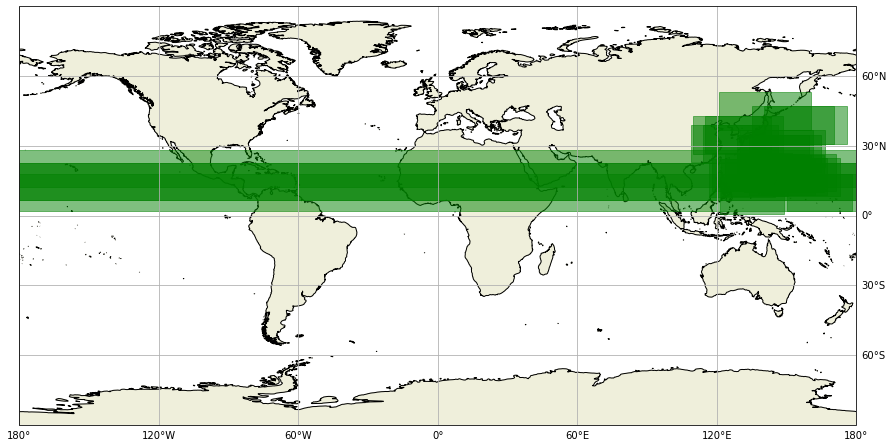

In [9]:
eo_harvest.plot(res)